In [1]:
import importlib
import numpy as np
import market
importlib.reload(market)
import ipywidgets as widgets
from market import strong_stocks, get_ohlc

In [2]:
ks_rate, df_ks = strong_stocks('kospi')

100%|████████████████████████████████████████████████████████████████████████████████| 958/958 [00:18<00:00, 50.82it/s]


In [3]:
kq_rate, df_kq = strong_stocks('kosdaq')

100%|██████████████████████████████████████████████████████████████████████████████| 1746/1746 [00:35<00:00, 48.54it/s]


In [4]:
df_ks.query(f'40 < rate < 50 and marcap > 100000000000').shape

(28, 3)

In [5]:
df_ks

,code,rate,marcap
0,000100,72.810841,7282983011200
1,000105,33.024119,84673398000
2,000120,37.327824,2274390696800
3,000150,106.796117,2463703798500
4,000155,108.764045,371271319800
...,...,...,...
364,417310,19.261822,208868000000
365,432320,29.925926,444701639725
366,452260,20.040282,231080655120
367,460850,23.154362,219456135040


In [32]:
def next_stock(button):
    out.clear_output()
    with out:
        if not next_stock.initial:
            if button == button_next:
                next_stock.cnt += 1
                next_stock.cnt = np.clip(next_stock.cnt, 0, len(df_ks)-1)
            else:
                next_stock.cnt -= 1
                next_stock.cnt = np.clip(next_stock.cnt, 0, len(df_ks)-1)
        else:
            next_stock.initial = False
        print(df_ks.iloc[next_stock.cnt, :])        
next_stock.cnt = 0
next_stock.initial = True

button_next = widgets.Button(
    description='Next',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='',
    icon='caret-right' # (FontAwesome names without the `fa-` prefix)
)
button_next.on_click(next_stock)

button_prev = widgets.Button(
    description='Prev',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='',
    icon='caret-left' # (FontAwesome names without the `fa-` prefix)
)
button_prev.on_click(next_stock)

out = widgets.Output(layout={'border': '1px solid black'})
out.clear_output()
with out:
    print(df_ks.iloc[0, :])
        
out = widgets.Output(layout={'border': '1px solid black'})

In [33]:
buttons = widgets.HBox([button_prev, button_next])
ui = widgets.VBox([buttons, out])

In [34]:
display(ui)

In [38]:
import yfinance as yf

from mplchart.chart import Chart
from mplchart.primitives import Candlesticks, Volume
from mplchart.indicators import ROC, SMA, EMA, RSI, MACD

ticker = 'AAPL'
prices = yf.Ticker(ticker).history('2y')

max_bars = 250

indicators = [
    Candlesticks(), SMA(50), SMA(200), Volume(),
    RSI(),
    MACD(),
]

# out = widgets.Output(layout={'border': '1px solid black'})
# with out:

D:\Programs\miniconda3\Lib\site-packages\yfinance\utils.py:782: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


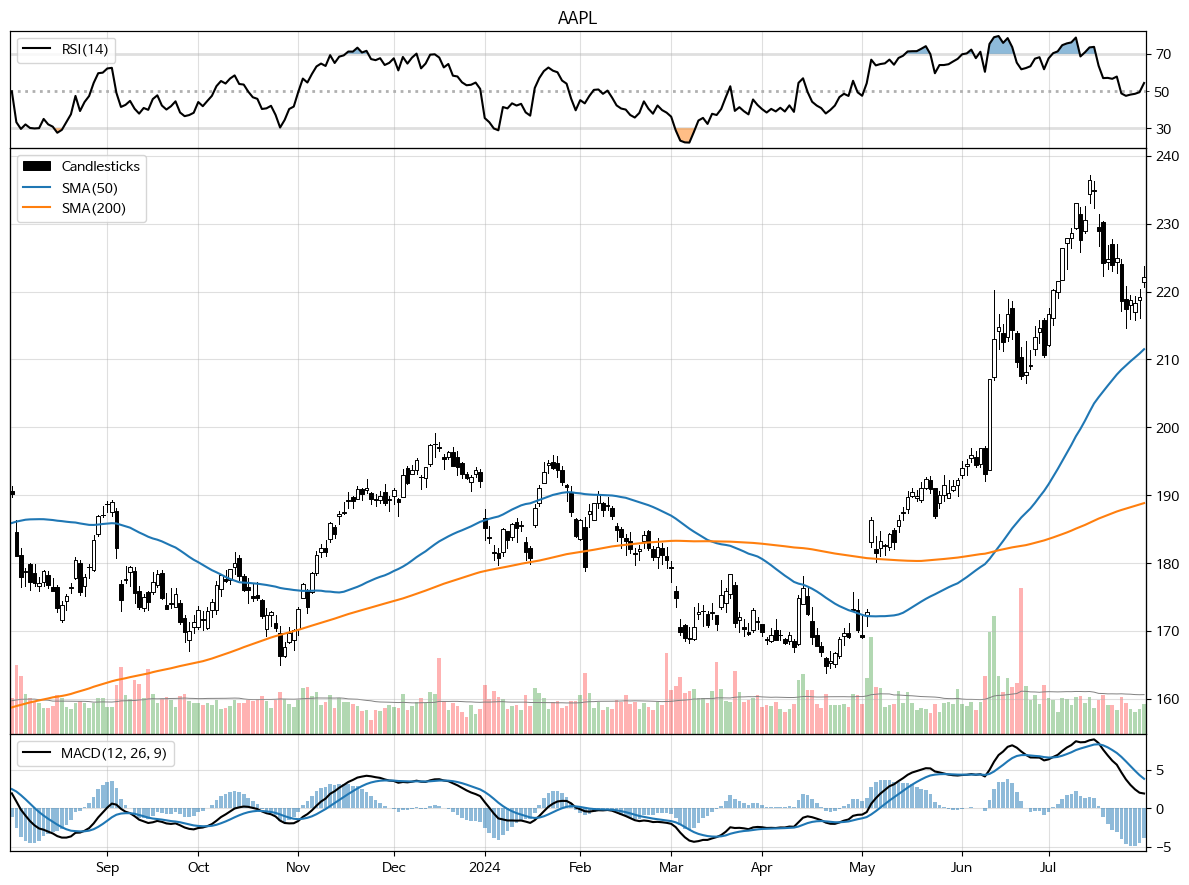

In [39]:
chart_div = widgets.Output(layout={'border': '1px solid black'})
with chart_div:
    chart = Chart(title=ticker, max_bars=max_bars)
    chart.plot(prices.iloc[:-2], indicators)

In [46]:
from datetime import timedelta, date 
get_ohlc(code='005930', end_date=date.today(), start_date=end_date-timedelta(days=365*2))

,Code,Market,Date,Open,High,Low,Close,Volume
0,005930,kospi,2022-08-05,61700.0,61900.0,61200.0,61500.0,9567620.0
1,005930,kospi,2022-08-08,61400.0,61400.0,60600.0,60800.0,11313150.0
2,005930,kospi,2022-08-09,60600.0,60700.0,59600.0,60000.0,18251170.0
3,005930,kospi,2022-08-10,58900.0,59200.0,58600.0,59100.0,18084349.0
4,005930,kospi,2022-08-11,59600.0,60000.0,59300.0,59900.0,15141941.0
...,...,...,...,...,...,...,...,...
487,005930,kospi,2024-07-30,80400.0,81000.0,80000.0,81000.0,13169636.0
488,005930,kospi,2024-07-31,81200.0,83900.0,80900.0,83900.0,20744323.0
489,005930,kospi,2024-08-01,86000.0,86100.0,83100.0,83100.0,20900338.0
490,005930,kospi,2024-08-02,81000.0,81400.0,79500.0,79600.0,25422371.0


In [ ]:
button_next = widgets.Button(
    description='Next',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='',
    icon='caret-right' # (FontAwesome names without the `fa-` prefix)
)
button_next.on_click(next_stock)

button_prev = widgets.Button(
    description='Prev',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='',
    icon='caret-left' # (FontAwesome names without the `fa-` prefix)
)
button_prev.on_click(next_stock)

In [48]:
prices.index

DatetimeIndex(['2022-08-03 00:00:00-04:00', '2022-08-04 00:00:00-04:00',
               '2022-08-05 00:00:00-04:00', '2022-08-08 00:00:00-04:00',
               '2022-08-09 00:00:00-04:00', '2022-08-10 00:00:00-04:00',
               '2022-08-11 00:00:00-04:00', '2022-08-12 00:00:00-04:00',
               '2022-08-15 00:00:00-04:00', '2022-08-16 00:00:00-04:00',
               ...
               '2024-07-22 00:00:00-04:00', '2024-07-23 00:00:00-04:00',
               '2024-07-24 00:00:00-04:00', '2024-07-25 00:00:00-04:00',
               '2024-07-26 00:00:00-04:00', '2024-07-29 00:00:00-04:00',
               '2024-07-30 00:00:00-04:00', '2024-07-31 00:00:00-04:00',
               '2024-08-01 00:00:00-04:00', '2024-08-02 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=503, freq=None)